In [91]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error

In [52]:
# ----- importing relevant station files ----- #
from google.colab import files
data_to_load = files.upload()

Saving Fielding_Lake_1268_clean.csv to Fielding_Lake_1268_clean (1).csv


In [53]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Fielding_Lake_1268_clean.csv']))

In [69]:
df = df.dropna()

df.head()

,Date,Fielding Lake (1268) Air Temperature Minimum (degC),Fielding Lake (1268) Air Temperature Average (degC),Fielding Lake (1268) Air Temperature Maximum (degC),Fielding Lake (1268) Precipitation Accumulation (mm) Start of Day Values,Fielding Lake (1268) Precipitation Increment - Snow-adj (mm),Fielding Lake (1268) Snow Depth (cm) Start of Day Values,Fielding Lake (1268) Snow Density (pct) Start of Day Values
0,2014-09-06,2.232258,7.580645,12.519355,285.225806,4.580645,2.903226,20.0
1,2014-09-07,2.096774,7.403226,12.409677,288.483871,4.467742,2.903226,20.0
2,2014-09-08,1.941935,7.300000,12.432258,291.677419,4.403226,2.903226,20.0
3,2014-09-09,1.893548,7.212903,12.283871,294.774194,4.661290,3.000000,20.0
4,2014-09-10,2.006452,7.074194,11.961290,298.129032,4.661290,3.000000,20.0


In [84]:
from sklearn.preprocessing import MinMaxScaler
sc1_s = MinMaxScaler(feature_range = (0, 1))
Xs_s = sc1_s.fit_transform(df[['Fielding Lake (1268) Air Temperature Minimum (degC)', 'Fielding Lake (1268) Air Temperature Average (degC)', 'Fielding Lake (1268) Air Temperature Maximum (degC)', 'Fielding Lake (1268) Snow Depth (cm) Start of Day Values']])
sc2 = MinMaxScaler(feature_range = (0, 1))
Ys = sc2.fit_transform(df[['Fielding Lake (1268) Snow Depth (cm) Start of Day Values']])

sc1_n = MinMaxScaler(feature_range = (0, 1))
Xs_n = sc1_n.fit_transform(df[['Fielding Lake (1268) Air Temperature Minimum (degC)', 'Fielding Lake (1268) Air Temperature Average (degC)', 'Fielding Lake (1268) Air Temperature Maximum (degC)']])

In [85]:
# Each time step uses the previous window to predict the next value
window = 1  # predicting 1 days ahead

X_train_s = []
y_train = []
X_train_n = []
for i in range(window, len(Ys)):
    X_train_s.append(Xs_s[i-window:i,:])
    y_train.append(Ys[i])
    X_train_n.append(Xs_n[i-window:i,:])

X_train_s, y_train = np.array(X_train_s), np.array(y_train)
X_train_n = np.array(X_train_n)

min_date = df['Date'].iloc[window]
date_time_obj = datetime.datetime.strptime(min_date, '%Y-%m-%d')
max_date = date_time_obj + timedelta(days=len(y_train)-1)
time_axis = pd.date_range(start=min_date, end=max_date)

In [86]:
# Shifted 
regressor_s = Sequential()
regressor_s.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_s.shape[1], X_train_s.shape[2])))
regressor_s.add(Dropout(0.2))
regressor_s.add(LSTM(units = 50, return_sequences = True))
regressor_s.add(Dropout(0.2))
regressor_s.add(LSTM(units = 50, return_sequences = True))
regressor_s.add(Dropout(0.2))
regressor_s.add(LSTM(units = 50))
regressor_s.add(Dropout(0.2))
regressor_s.add(Dense(units = 1))
regressor_s.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor_s.fit(X_train_s, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
74/74 [==============================] - 6s 5ms/step - loss: 0.0989
Epoch 2/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 3/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 4/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 5/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 6/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 7/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 8/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 9/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 10/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 11/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 12/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 13/15
74/74 [==============================

In [87]:
# Not shifted
regressor_n = Sequential()
regressor_n.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_n.shape[1], X_train_n.shape[2])))
regressor_n.add(Dropout(0.2))
regressor_n.add(LSTM(units = 50, return_sequences = True))
regressor_n.add(Dropout(0.2))
regressor_n.add(LSTM(units = 50, return_sequences = True))
regressor_n.add(Dropout(0.2))
regressor_n.add(LSTM(units = 50))
regressor_n.add(Dropout(0.2))
regressor_n.add(Dense(units = 1))
regressor_n.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor_n.fit(X_train_n, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
74/74 [==============================] - 6s 6ms/step - loss: 0.1008
Epoch 2/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0580
Epoch 3/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0373
Epoch 4/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0403
Epoch 5/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0367
Epoch 6/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0368
Epoch 7/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0391
Epoch 8/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0371
Epoch 9/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0361
Epoch 10/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0368
Epoch 11/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0364
Epoch 12/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0378
Epoch 13/15
74/74 [==============================

In [88]:
y_predict_s = regressor_s.predict(X_train_s)
y_predict_n = regressor_n.predict(X_train_n)

#unscale the output
y_predict_unscaled_s = sc2.inverse_transform(y_predict_s)
y_train_unscaled = sc2.inverse_transform(y_train)
y_predict_unscaled_n = sc2.inverse_transform(y_predict_n)

Text(0.5, 1.0, 'Fielding Lake Snow Depth')

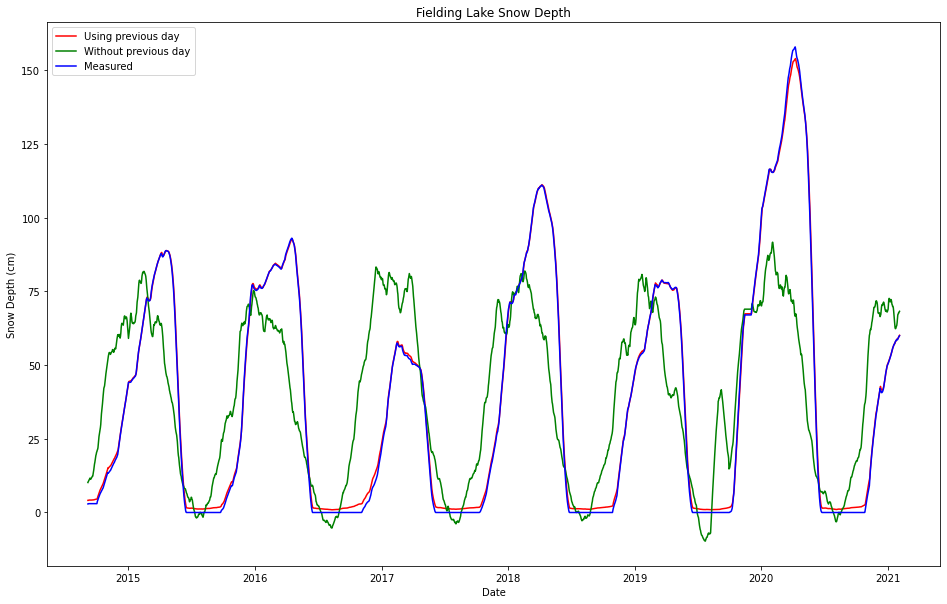

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.plot(time_axis, y_predict_unscaled_s, 'r-', label='Using previous day')
plt.plot(time_axis, y_predict_unscaled_n, 'g-', label='Without previous day')
plt.plot(time_axis, y_train_unscaled, 'b-', label='Measured')
plt.legend()
plt.ylabel('Snow Depth (cm)')
plt.xlabel('Date')
plt.title('Fielding Lake Snow Depth')

In [93]:
rms_s = mean_squared_error(y_train_unscaled, y_predict_unscaled_s, squared=False)  # Calculating root mean squared error
rms_n = mean_squared_error(y_train_unscaled, y_predict_unscaled_n, squared=False)  # Calculating root mean squared error
print('--------- Using previous snow depth -------------')
print('average rms is ' + str(rms_s))  # Calculating and printing mean rms
print('------- Not using previous snow depth ------------')
print('average rms is ' + str(rms_n))  # Calculating and printing mean rms

--------- Using previous snow depth -------------
average rms is 1.3576978882705166
------- Not using previous snow depth ------------
average rms is 29.58808141083825
